# Diabet kasallagiga tashxis qo'yish. (Mohirdev.uz loyihasi asosida)

## Vazifa
### Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.

## Tarkib
### Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.

## Ustunlar
#### * Pregnancies: homilador bo'lish soni
#### * Glucose: glyukozaga test natijasi
#### * BloodPressure: diastolik qon bosimi (mm Hg)
#### * SkinThickness: Triceps teri burmasining qalinligi (mm)
#### * Insulin: 2 soatlik sarum insulini (mu U/ml)
#### * BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)
#### * DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
#### * Age: Yosh (yil)
#### * Outcome: Class (0 - diabet yo'q, 1 - diabet)

## Dataset: 
#### * https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
%matplotlib inline

In [3]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
raw_data.shape

(768, 9)

In [5]:
raw_data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


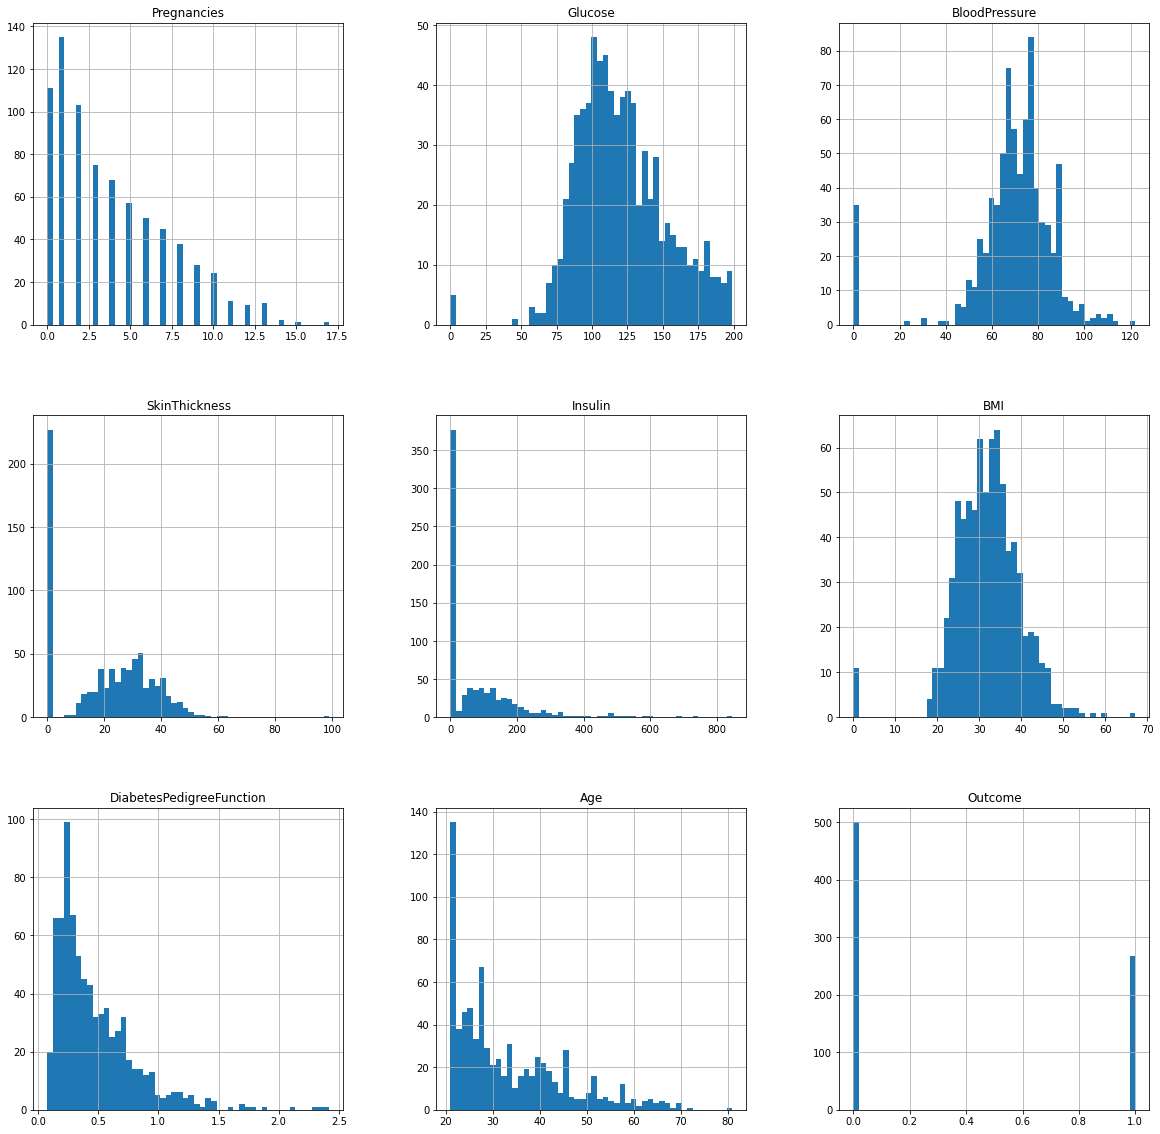

In [6]:
raw_data.hist(figsize=(20,20), bins = 50)

plt.show()

In [7]:
raw_data.corrwith(raw_data.Outcome)

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [8]:
X = raw_data.drop('Outcome', axis=1)
y = raw_data.Outcome

## Train hamda Test setlarga ajratish uchun bizda malumotlar ko'p emas shuning uchun Cross Vallidation usulidan foydalanamiz. Muammo klassifikatsiyaga doir bo'lgani uchun k-NN algoritmidan foydalangan holda hal etib ko'ramiz.

### Dastavval standartlashtirib olamiz

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(X)

### Eng maqul K qiymatni topishga harakat qilib ko'ramiz (Grid Searche yordamizda)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
knn = KNeighborsClassifier()

In [16]:
knn.fit(X_scaled, y)

KNeighborsClassifier()

In [17]:
f1 = []
for k in range(1,26):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_scaled, y)
    y_predict = knn.predict(X_scaled)
    f1.append(sklearn.metrics.f1_score(y, y_predict))

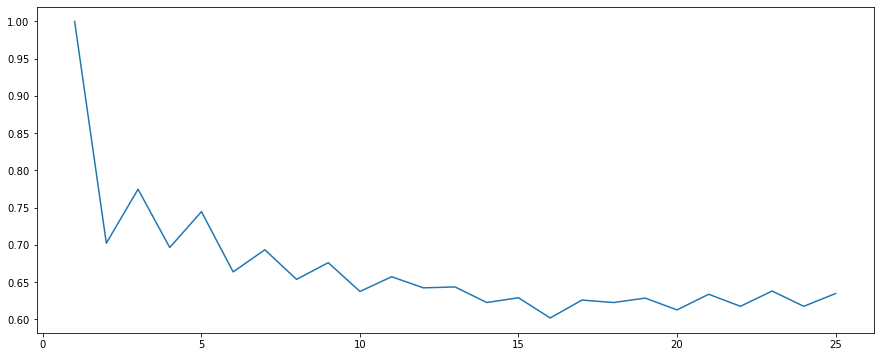

In [42]:
plt.figure(figsize=(15,6))

plt.plot(range(1,26), f1)

plt.show()

In [19]:
param = {'n_neighbors' : np.arange(1,25)}
knn_gscv = GridSearchCV(estimator= knn, param_grid=param, cv= 5)

In [22]:
knn_gscv.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [23]:
knn_gscv.best_score_

0.7669892199303965

In [26]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13])

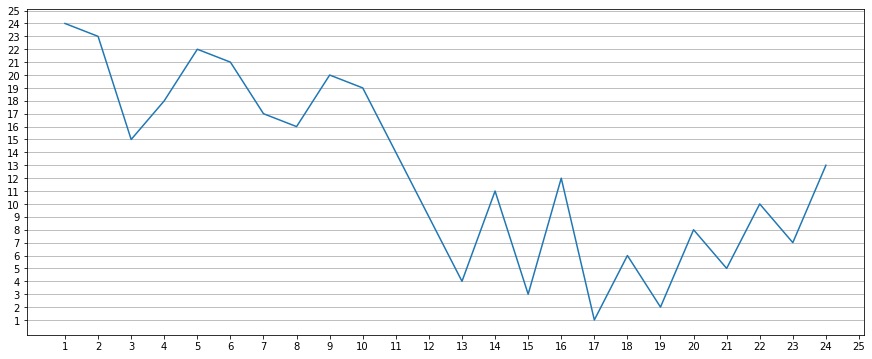

In [39]:
plt.figure(figsize=(15,6))

plt.plot(param['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])

plt.xticks(np.arange(1,26))
plt.yticks(np.arange(1,26))
plt.grid(axis= 'y')

plt.show()

### Demak bizda f1_score orqali k-16 hamda Grid Search bo'yicha k-17 qiymatlari chiqmoqda 2 lasini ham tekshirib ko'ramiz. Buning sababi f1_score da Cross Validation orqali Train hamda Test setga ajratilmagan edi

In [73]:
knn_16 = KNeighborsClassifier(n_neighbors=16)

In [74]:
pred_values_16 = cross_val_predict(estimator=knn_16, X=X_scaled, y=y, cv=5)

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [76]:
confusion_matrix(y, pred_values_16)

array([[448,  52],
       [142, 126]], dtype=int64)

In [77]:
print(f'Accuracy : {accuracy_score(y, pred_values_16).round(3)}')

Accuracy : 0.747


In [78]:
knn_17 = KNeighborsClassifier(n_neighbors=17)

In [79]:
pred_values_17 = cross_val_predict(estimator=knn_17, X=X_scaled, y=y, cv=5)

In [80]:
confusion_matrix(y, pred_values_17)

array([[444,  56],
       [123, 145]], dtype=int64)

In [81]:
print(f'Accuracy : {accuracy_score(y, pred_values_17).round(3)}')

Accuracy : 0.767


In [86]:
accur = {}

for k in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = cross_val_predict(estimator=knn, X=X_scaled, y=y, cv = 5)
    score = accuracy_score(y, pred).round(3)
    accur[k] = score

In [92]:
accur = pd.Series(accur)
accur.sort_values(ascending=False)

17    0.767
19    0.766
15    0.762
13    0.758
21    0.757
18    0.755
23    0.754
25    0.754
12    0.750
20    0.750
14    0.749
22    0.749
16    0.747
24    0.746
11    0.745
7     0.742
8     0.742
3     0.742
4     0.740
10    0.738
9     0.736
6     0.734
5     0.733
2     0.720
1     0.712
dtype: float64

### Demak eng yaxshi natijamiz 76.7 % hisoblanadi va buni yaxshilash uchun soha mutahasislari bilan suhbatlashib ko'rish kerak chunki datani tozalamadik sababi bu yunalishda yetarli malummotga ega emasmiz balkim datada noodatiy qiymatlar mavjuddir ularni o'chirish kerak shuningdek Train qilishga ko'proq data kerak biz atigi 768 qator data bilan Train - Test qildik bu ham aniqlikning pastligiga bir sabab.

In [93]:
print(f'Best Accuracy : {accuracy_score(y, pred_values_17).round(3)}')

Best Accuracy : 0.767
